### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [745]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [747]:
data = pd.read_csv('data/coupons.csv')

In [748]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7169,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,31,Married partner,...,never,4~8,4~8,1~3,1,1,1,0,1,1
9771,Work,Alone,Rainy,55,7AM,Bar,1d,Female,50plus,Married partner,...,less1,4~8,1~3,1~3,1,1,1,0,1,0
9066,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,26,Married partner,...,1~3,4~8,4~8,less1,1,1,0,0,1,1
9412,Home,Alone,Sunny,30,6PM,Restaurant(20-50),1d,Female,50plus,Divorced,...,never,4~8,1~3,less1,1,0,0,1,0,0
8124,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,31,Single,...,never,gt8,1~3,never,1,1,0,0,1,0
9305,Home,Alone,Rainy,55,6PM,Bar,1d,Male,below21,Single,...,less1,1~3,4~8,4~8,1,1,1,0,1,1
1053,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,50plus,Unmarried partner,...,never,1~3,gt8,never,1,0,0,1,0,0
11583,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,36,Unmarried partner,...,4~8,4~8,less1,less1,1,0,0,1,0,1
10356,Work,Alone,Sunny,80,7AM,Coffee House,1d,Male,21,Single,...,4~8,less1,never,never,1,0,0,1,0,1
6660,Home,Partner,Sunny,55,10PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,4~8,less1,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [750]:
# check column names and number of rows 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [751]:
# explore missing values as fraction of total rows
data.isna().mean()

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

In [752]:
# get descriptive statistics 
data.describe().round(2)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.00,12684.00,12684.0,12684.00,12684.00,12684.00,12684.00,12684.00
mean,63.30,0.41,1.0,0.56,0.12,0.21,0.79,0.57
std,19.15,0.49,0.0,0.50,0.32,0.41,0.41,0.50
min,30.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,55.00,0.00,1.0,0.00,0.00,0.00,1.00,0.00
50%,80.00,0.00,1.0,1.00,0.00,0.00,1.00,1.00
75%,80.00,1.00,1.0,1.00,0.00,0.00,1.00,1.00
max,80.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


3. Decide what to do about your missing data -- drop, replace, other...

In [754]:
# car column has over 99% of its rows missing/null. This column in ineffective for analysis and should be excluded

#remove car column 
data_clean = data.drop("car", axis = 1)

#rename passenger column name to correct spelling
data_clean = data_clean.rename(columns={"passanger" :  "passenger"})

In [755]:
# The other 5 columns with missing values have under 1% of their values missing. They are all categorical attributes. 
# To remove the missing values, the rows with missing values can be deleted since they are a small fraction or they can be filled with the most frequent entry in the column. 
# Keeping the missing values as it is with no changes for now. 
data_clean[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].value_counts()

Bar    CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50
never  1~3          1~3        1~3                   1~3                 175
                                                     less1               174
less1  1~3          1~3        1~3                   less1               154
       less1        gt8        4~8                   less1               154
never  less1        4~8        1~3                   less1               127
                                                                        ... 
       never        4~8        less1                 1~3                  17
1~3    gt8          gt8        gt8                   gt8                  17
less1  gt8          4~8        4~8                   4~8                  14
never  4~8          less1      4~8                   less1                 6
       1~3          4~8        gt8                   gt8                   6
Name: count, Length: 313, dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [757]:
# check on the propostion of customers responding yes to offer 
data_clean['Y'].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

**57% of drivers accepted the coupon**

5. Use a bar plot to visualize the `coupon` column.

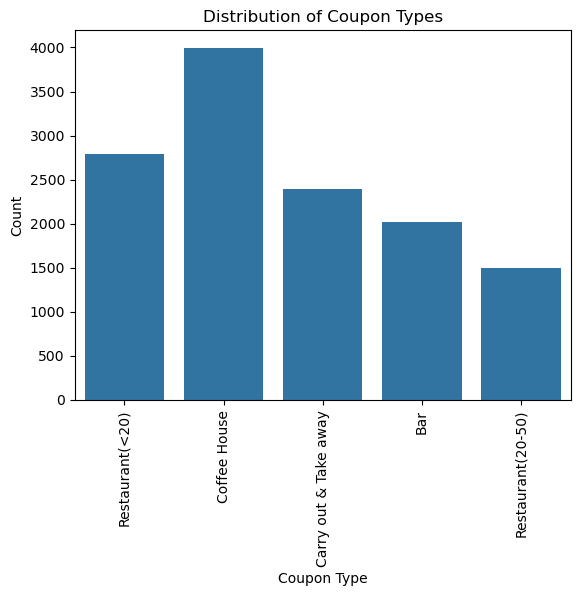

In [760]:
# bar plot of coupon column
sns.countplot(data_clean, x = "coupon")
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.xticks(rotation = 90)
plt.ylabel("Count");

6. Use a histogram to visualize the temperature column.

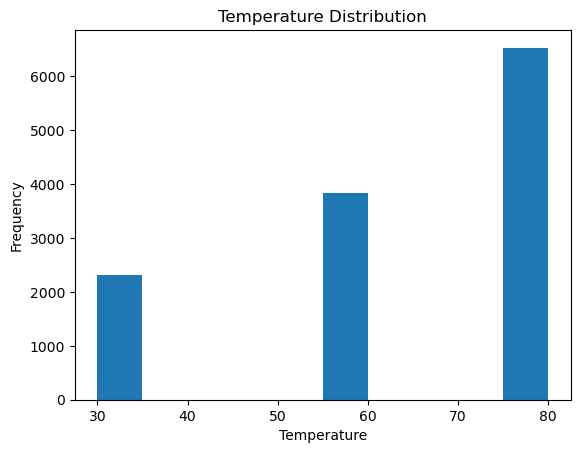

In [762]:
# histogram of temperature column 
fig2 = data_clean['temperature'].plot(kind = "hist")
fig2.set_title("Temperature Distribution")
fig2.set_xlabel("Temperature");

7. Use a bar plot to visualize the age distribution.

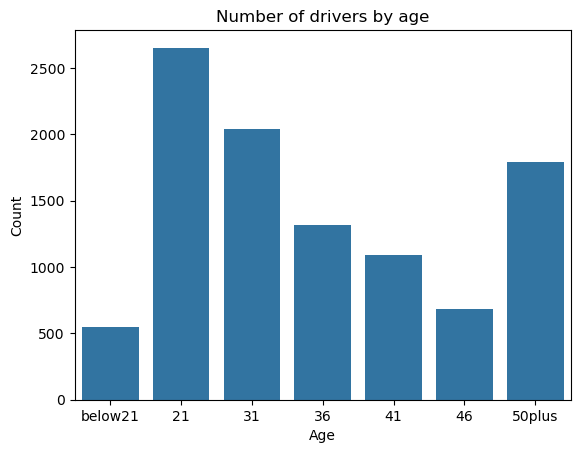

In [764]:
# age distrbution 
sns.barplot(data = data_clean['age'].value_counts(), order = ["below21", "21", "31", "36", "41", "46", "50plus"])
plt.title("Number of drivers by age")
plt.xlabel("Age")
plt.ylabel("Count");

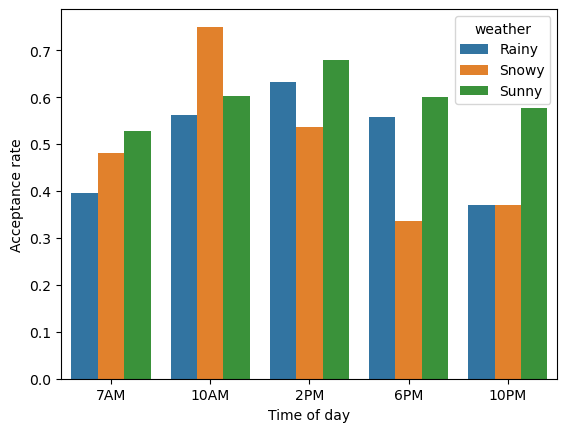

In [765]:
#analysis by weather and time of day 
data_wea_time = data_clean.groupby(["weather", "time"])["Y"].value_counts(normalize = True).reset_index()
sns.barplot(data = data_wea_time.query('Y == 1'), x = "time", y = "proportion", 
            hue = "weather", order = ["7AM", "10AM", "2PM", "6PM", "10PM"])
plt.xlabel("Time of day")
plt.ylabel("Acceptance rate");

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [767]:
data_bar = data_clean.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [769]:
#proportion of coupons accepted for the customers with bar coupon 
data_bar["Y"].value_counts(normalize = True)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

**41% of customers receiving the 'Bar' coupon accepted them**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
   

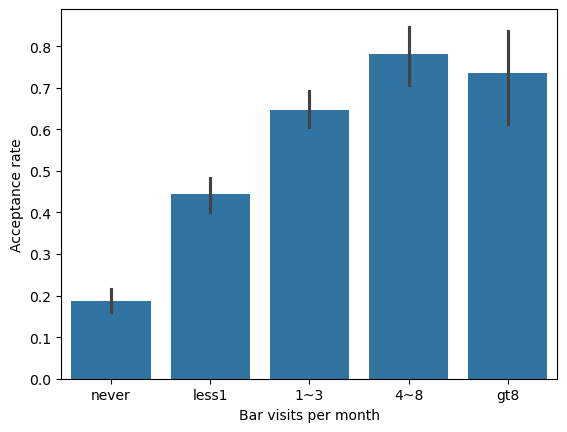

In [772]:
#bar plot of the acceptance count of Bar categories. The Y axis shows acceptance rate (mean of 1/0 acceptance)
sns.barplot(data = data_bar, x = "Bar", y="Y", order=["never", "less1", "1~3", "4~8", "gt8"])
plt.xlabel("Bar visits per month")
plt.ylabel("Acceptance rate");


**The acceptance rate of customers with 3 or less bar visits per month is lower than those with greater than 3 visits per month**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Over age of 25: 0.71
Under  age of 25: 0.65


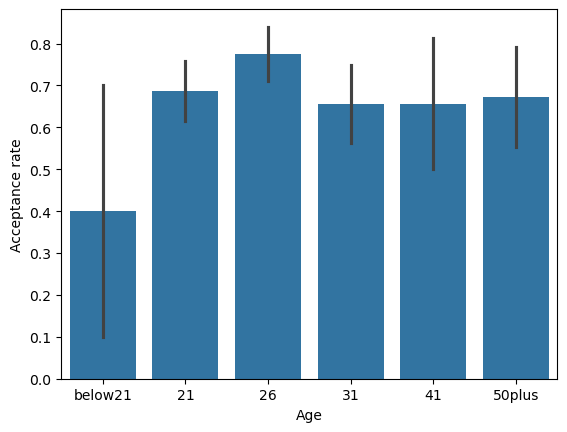

In [775]:
#subset of who go to a bar more than once a month 
bar_more_than_1 = data_bar.query('Bar in ["1~3", "4~8", "gt8"]')
# and age over 25 
bar_visit_gt_age = bar_more_than_1.query('age in ["26", "31", "41", "50plus"]')["Y"].mean().round(2)
bar_visit_lt_age = bar_more_than_1.query('age not in ["26", "31", "41", "50plus"]')["Y"].mean().round(2)
#acceptance by age
sns.barplot(bar_more_than_1, x = "age", y = "Y", order = ["below21", "21", "26", "31", "41", "50plus"]) 
plt.xlabel("Age")
plt.ylabel("Acceptance rate");
print(f"Over age of 25: {bar_visit_gt_age}")
print(f"Under  age of 25: {bar_visit_lt_age}")

**Drivers who go to a bar more than once a month and are above the age 25 have higher rate of acceptance(71%) than under 25(65%)**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [778]:
print#(f"Driver who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {bar_more_than_1.query('passenger not in ["Kid(s)"] & occupation not in ["farming", "fishing", "forestry"]')["Y"].mean().round(2)}")
print#(f"Others: {bar_more_than_1.query('passenger in ["Kid(s)"] & occupation in ["farming", "fishing", "forestry"]')["Y"].mean().round(2)} ")

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

# There are no occupations named farming, fishing or forestry

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [781]:
#querying for conditions 
bar_pass = bar_more_than_1.query('passenger not in ["Kid(s)"] & maritalStatus not in ["Widowed"]')["Y"].mean().round(2)
bar_age = bar_more_than_1.query('age in ["below21", "21", "26"]')["Y"].mean().round(2)
bar_visit_inc = data_bar.query('RestaurantLessThan20 in ["4~8", "gt8"] & income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999" ]')["Y"].mean().round(2)

print(f"Acceptance of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {bar_pass}")
print(f"Acceptance of drivers who go to bars more than once a month and are under the age of 30: {bar_age}" )
print(f"Acceptance of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {bar_visit_inc}")

Acceptance of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.71
Acceptance of drivers who go to bars more than once a month and are under the age of 30: 0.72
Acceptance of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Observations on drivers who received Bar coupons -**
1. Overall 41% of the drivers accepted a Bar coupon, which is not very high.
2. The acceptance rate of customers with 3 or less bar visits per month is lower than those with greater than 3 visits per month - **Focus on drivers who have higher visit to bar per month**
3. Drivers who go to a bar more than once a month and are above the age 25 have higher rate of acceptance(71%) than under 25(65%). Especially, 21-30 year olds have the highest acceptance rate. - **Focus on drivers between 21 and 30 years**
4. Drivers with no kids and not Widowed also have high acceptance rate 71% - **Focus on drivers when they are not traveling with their kids**
5. Drivers who visit cheap restaurants more a lot and have low income are very less likely to accept the coupon - **Focus on greater than 50k income and drivers who do not frequent cheap restaurants moe than 4 times a month**

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Focusing on Carry out & Take away coupon group
### Hypothesis - 
Overall, late afternoon is a good time to deliver a Carry out & Take away coupon. Drivers with kids in car and expiration 1d will have higher acceptance rate, while drivers alone will have higher acceptance rate in early mornings or late night and 2h expiration. Carry out and take away coupons will have higher accpetance for drivers who go to carry away greater than 3 times a month.

In [787]:
# carry out and take away coupons only
data_co = data_clean.query('coupon == "Carry out & Take away"')

# overall carry out coupon acceptance
data_co["Y"].value_counts(normalize = True)

Y
1    0.735478
0    0.264522
Name: proportion, dtype: float64

### Effect of Time of Day 

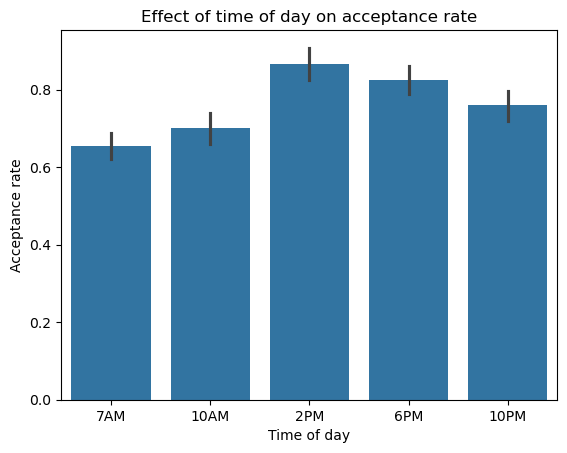

In [789]:

sns.barplot(data = data_co, x="time", y = "Y", order=["7AM", "10AM", "2PM", "6PM", "10PM"])
plt.title("Effect of time of day on acceptance rate")
plt.xlabel("Time of day")
plt.ylabel("Acceptance rate");

**Acceptance rate for all Carry out & Take away coupons are higher than average in the late afternoon/evening times**

In [791]:
# group by passenger, time and direction_same  and calculate acceptance rate for each item
data_grouped = data_co.groupby(["passenger", "time", "expiration"])["Y"].agg(['count','sum']).reset_index()
data_grouped["acceptance_rate"] = data_grouped["sum"]/data_grouped["count"]

#combine time and expiration column
data_grouped["time_day_exp"] = data_grouped["time"]+ "-" + data_grouped["expiration"]
data_grouped = data_grouped.sort_values(by = ["time", "expiration"])
data_grouped

,passenger,time,expiration,count,sum,acceptance_rate,time_day_exp
0,Alone,10AM,1d,38,35,0.921053,10AM-1d
7,Friend(s),10AM,1d,87,64,0.735632,10AM-1d
12,Kid(s),10AM,1d,24,19,0.791667,10AM-1d
8,Friend(s),10AM,2h,271,175,0.645756,10AM-2h
13,Kid(s),10AM,2h,65,48,0.738462,10AM-2h
17,Partner,10AM,2h,32,22,0.687500,10AM-2h
1,Alone,10PM,1d,223,176,0.789238,10PM-1d
9,Friend(s),10PM,1d,177,139,0.785311,10PM-1d
18,Partner,10PM,1d,4,2,0.500000,10PM-1d
14,Kid(s),10PM,2h,24,8,0.333333,10PM-2h


In [792]:
#pivot on time
data_pivot = data_grouped.pivot(index="time_day_exp", columns="passenger", values="acceptance_rate")
data_pivot

passenger,Alone,Friend(s),Kid(s),Partner
time_day_exp,,,,
10AM-1d,0.921053,0.735632,0.791667,NaN
10AM-2h,NaN,0.645756,0.738462,0.687500
10PM-1d,0.789238,0.785311,NaN,0.500000
10PM-2h,NaN,NaN,0.333333,0.757576
2PM-1d,NaN,0.889503,NaN,NaN
2PM-2h,0.756757,NaN,NaN,NaN
6PM-1d,0.826590,0.913043,1.000000,0.785714
6PM-2h,0.819767,NaN,0.787879,NaN
7AM-1d,0.711382,NaN,NaN,NaN


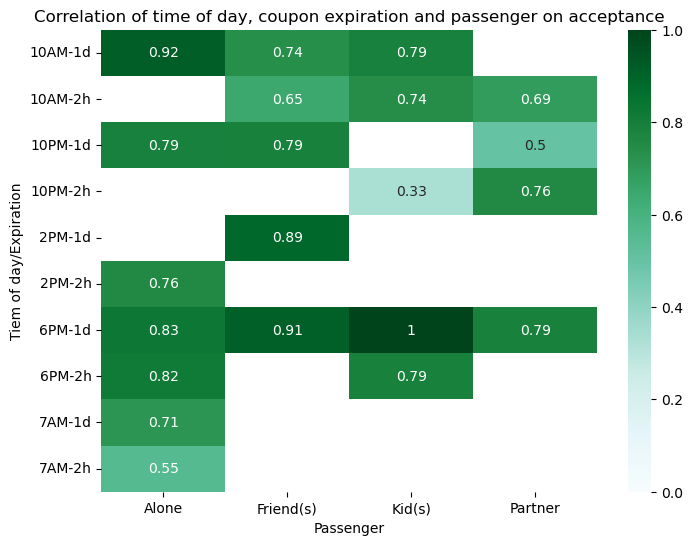

In [793]:
# see correlation between passenger and time of day with heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(data = data_pivot, annot = True, cmap="BuGn", vmin=0);
plt.title("Correlation of time of day, coupon expiration and passenger on acceptance")
plt.xlabel("Passenger")
plt.ylabel("Tiem of day/Expiration");

**Drivers with kids in the car are most likely to accept coupon around 6PM and with expiration of 1d, followed by morning time. Lowest for this group is late nights.** 
**Drivers alone are more likely to accept coupon late evening/night or around 10AM, irrespective of expiration. They are least likely to accept early morning(7AM)**

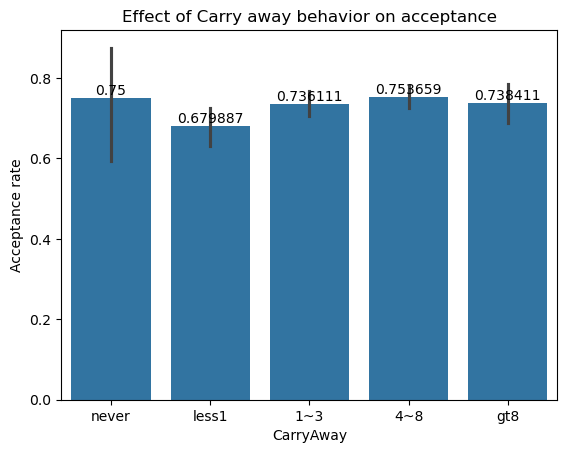

In [795]:
#analysis of acceptance against carryout behavior 
ax = sns.barplot(data = data_co, x = "CarryAway", y="Y", order = ["never", "less1", "1~3", "4~8", "gt8"])
ax.bar_label(ax.containers[0])
ax.set_title("Effect of Carry away behavior on acceptance")
ax.set_ylabel("Acceptance rate");

**The carry away behavior per month does not have any conclusive relation to driver behavior in accepting the coupon. Drivers with Less than 1 visit per month have the lowest acceptance, but their is no apparent trend on visits per month on acceptance**